In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 2: The Labeled Faces in the Wild Dataset

In [12]:
# Run this cell to load the Labeled Faces in the Wild people dataset
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data/255
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

There are 1288 images, and each image has 1850 features. This is because each image is 50x37 pixels, and each feature simply represents one pixel's intensity.

(-0.5, 36.5, 49.5, -0.5)

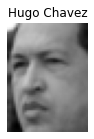

In [13]:
plt.figure(figsize=(2,2))
some_face = X[0]
some_face_image = some_face.reshape(50,37)
plt.imshow(some_face_image,cmap='gray')
plt.title(target_names[y[0]])
plt.axis('off')

The following figure shows a few more images from the lfw dataset

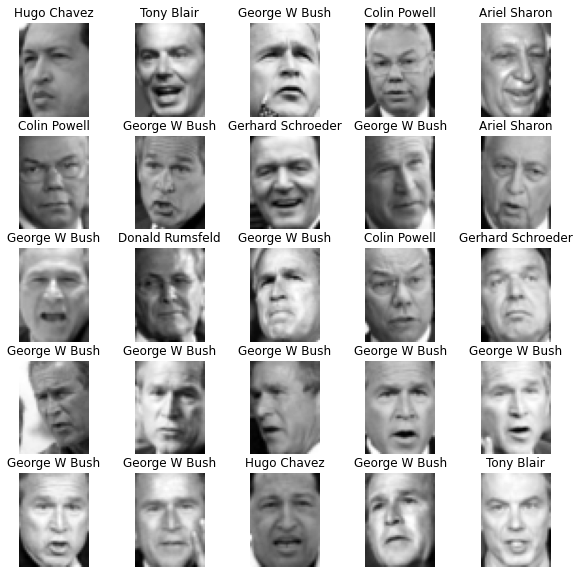

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    face = X[i]
    face_image = face.reshape(50,37)
    plt.subplot(5,5,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.title(target_names[y[i]])
    plt.axis('off')    

**Labels:**

| Label | Description |
| :- | -: |
| 0 | Ariel Sharon |    
| 1 | Colin Powell |       
| 2 | Donald Rumsfeld |      
| 3 | George W Bush |       
| 4 | Gerhard Schroeder |      
| 5 | Hugo Chavez |      
| 6 | Tony Blair |  

**The goal** is to use the softmax classifier to predict the labels of the images.

## Part 1

Split the dataset into training and test sets

In [16]:
X.shape

(1288, 1850)

In [18]:
# shuffle the data
permutation = np.random.permutation(len(y))
X = X[permutation]
y = y[permutation]

In [19]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

## Part 2

Use the training data to fit a softmax regression model

In [35]:
def softmax(X,theta):
    m,n = X.shape
    _,k = theta.shape
    Y = np.exp(X@theta)
    d = np.linalg.norm(Y,ord=1,axis=1) # with ord=1, it computes 1-norm
    return np.diag(1/d)@Y

def cost_softmax(X,theta,Y):
    m,n = X.shape
    _,k = theta.shape
    cost = 0
    Yhat = softmax(X,theta)
    for i in range(m):
        for j in range(k):
            cost = cost + Y[i,j]*np.log(Yhat[i,j])
    # alternative formula: cost = np.trace(Y.T@np.log(Yhat))
    return (-1/m)*cost

def softmax_regression_GD(X,Y,s,n_iterations):
    m,n = X.shape
    _,k = Y.shape
    theta = np.random.randn(n,k)
    E = np.zeros((n_iterations,1))
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(softmax(X,theta)-Y)
        theta = theta - s * gradient
        E[i] = cost_softmax(X,theta,Y)
    return E,theta

def softmax_classifier(X,theta):
    P = softmax(X,theta)
    return np.argmax(np.round(P,2),axis=1)

In [21]:
# one-hot encoding
Y_train = np.zeros((len(y_train),n_classes))
for i in range(n_classes):
    Y_train[y_train==i,i]=1

In [42]:
s = 0.05
n_iterations = 10000
E, theta = softmax_regression_GD(X_train,Y_train,s,n_iterations)

Text(0.5, 1.0, 'Convergence of Gradient Descent')

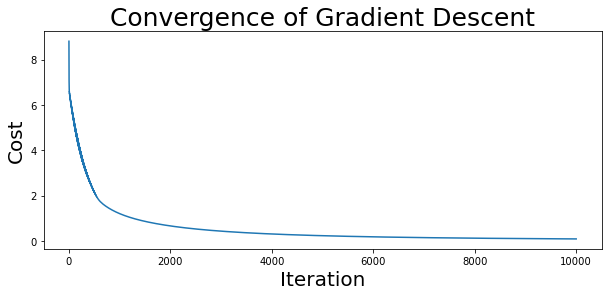

In [43]:
plt.figure(figsize = (10,4))
plt.plot(E)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)
plt.title('Convergence of Gradient Descent',fontsize=25)

## Part 3

Test your classifier on the test set

In [44]:
y_test_pred = softmax_classifier(X_test,theta)

In [45]:
'confusion matrix'
C = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[ 19.,   2.,   3.,   0.,   0.,   0.,   0.],
       [  5.,  65.,   3.,   3.,   1.,   1.,   6.],
       [  2.,   7.,  27.,  18.,   3.,   0.,   4.],
       [  3.,   9.,   9., 165.,   9.,   1.,   4.],
       [  0.,   2.,   0.,   2.,  26.,   4.,   7.],
       [  0.,   0.,   0.,   3.,   3.,  18.,   3.],
       [  2.,   1.,   0.,   6.,   1.,   4.,  37.]])

In [46]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_pred)
100*num_correct/len(y_test)

73.15573770491804